#### Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read The Dataset

In [2]:
df = pd.read_csv('CAR_DETAILS.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
df.shape
# rows:4340,cols:8

(4340, 8)

#### Data preprocessing

##### 1) Handle Null values

In [4]:
nv = df.isnull().sum()
nv = nv[nv>0]
nv

Series([], dtype: int64)

##### 2) Checking Redunant Features

In [5]:
df["name"] = df.name.apply(lambda x: x.split()[0]) ## Replacing Car name with brand name

print(df.columns)
df.head()

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner


##### 3) Handling Duplicates

In [6]:
df.duplicated().sum()

790

In [7]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [8]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [9]:
df.describe()

,year,selling_price,km_driven
count,3550.000000,3.550000e+03,3550.000000
mean,2012.956901,4.746099e+05,69380.056901
std,4.252141,5.108341e+05,47647.754330
min,1992.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,36000.000000
50%,2013.000000,3.500000e+05,60658.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


##### 4) Check Data Type

In [10]:
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

##### Separate Numerical and Categorial features

In [11]:
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')
Index(['year', 'selling_price', 'km_driven'], dtype='object')


In [12]:
for i in cat_cols:
    print(f'Feature {i} | Unique Count  {df[i].nunique()}')

Feature name | Unique Count  29
Feature fuel | Unique Count  5
Feature seller_type | Unique Count  3
Feature transmission | Unique Count  2
Feature owner | Unique Count  5


#### EDA:

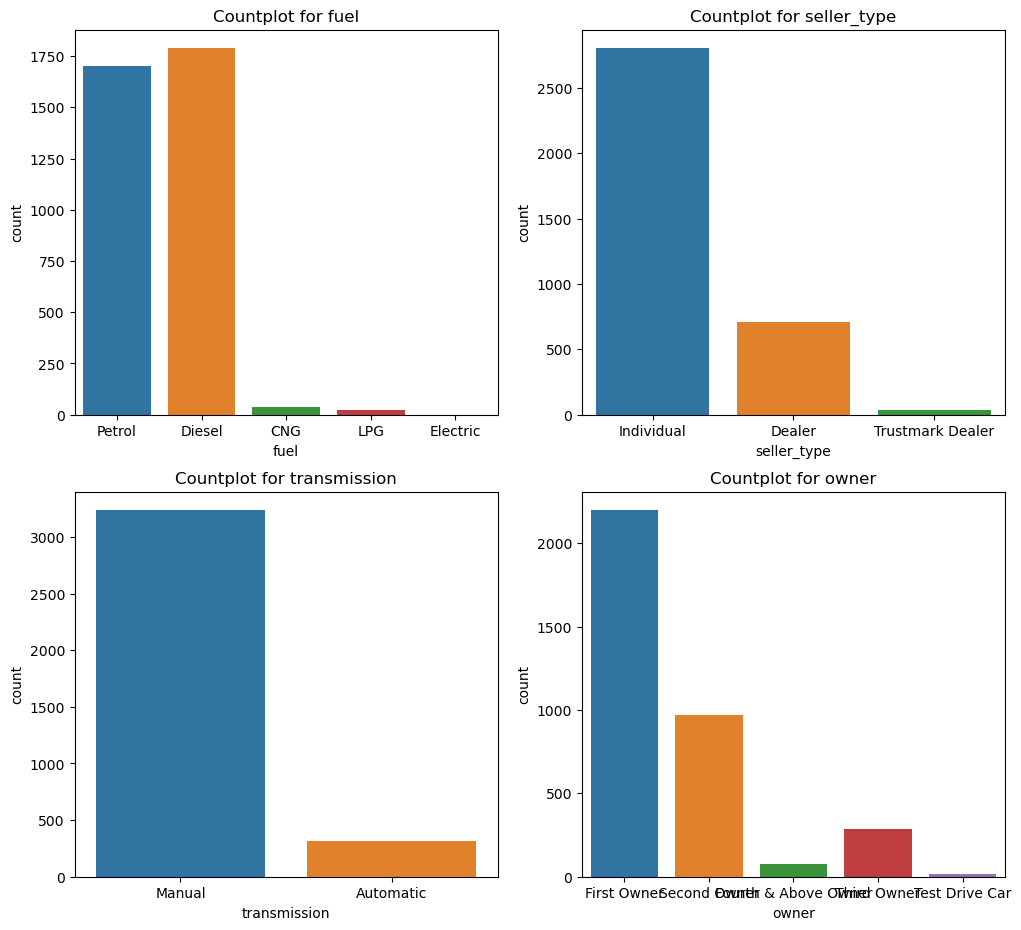

In [13]:
cols = ['fuel', 'seller_type', 'transmission', 'owner']
plt.figure(figsize=(12,11))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[cols[i]])
    plt.title(f'Countplot for {cols[i]}')
plt.show()

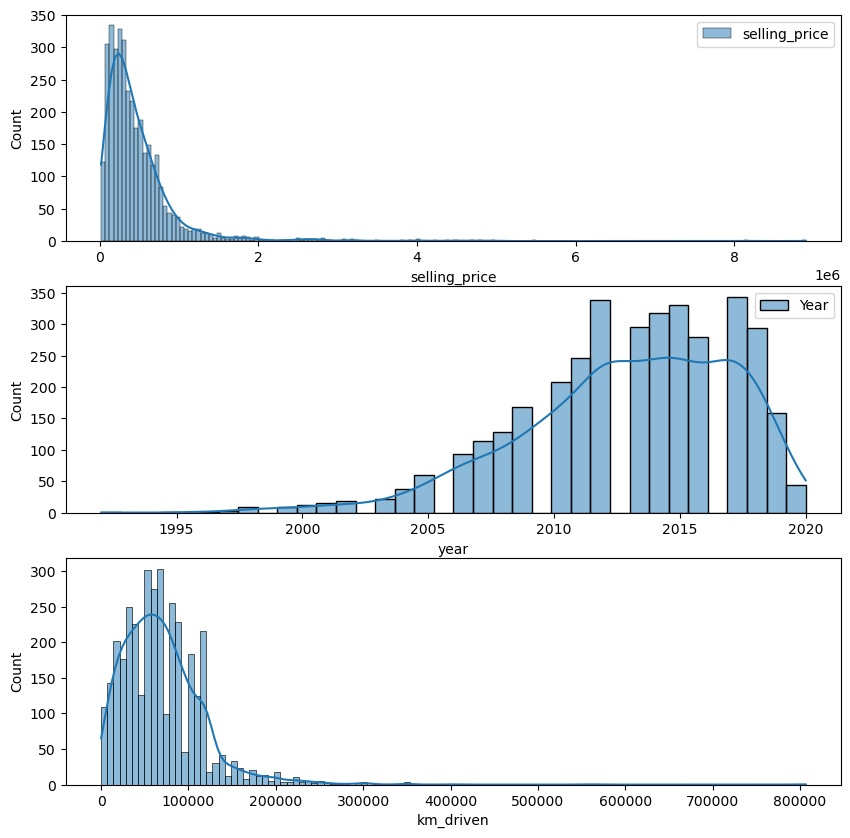

In [14]:
# Observing the distribution of numeric columns
plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 1)
sns.histplot(x="selling_price", data=df, kde=True, label="selling_price")
plt.legend()
plt.subplot(3, 1, 2)
sns.histplot(x="year", data=df, kde=True, label="Year")
plt.legend()
plt.subplot(3, 1, 3)
sns.histplot(x="km_driven", data=df, kde=True)
plt.show()

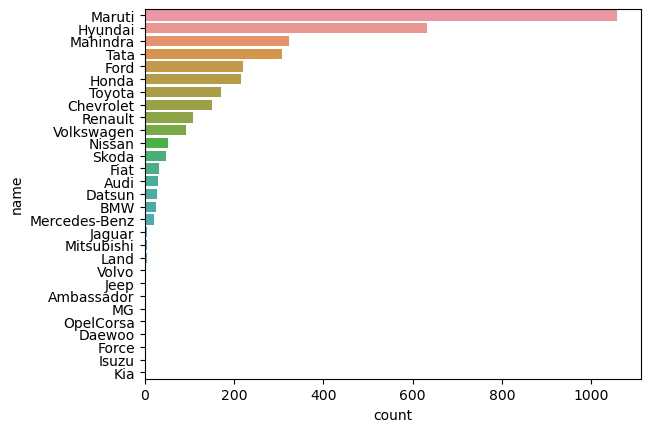

In [15]:
sns.countplot(y = df['name'],
              order=df['name'].value_counts().sort_values(ascending=False).index)
plt.show()

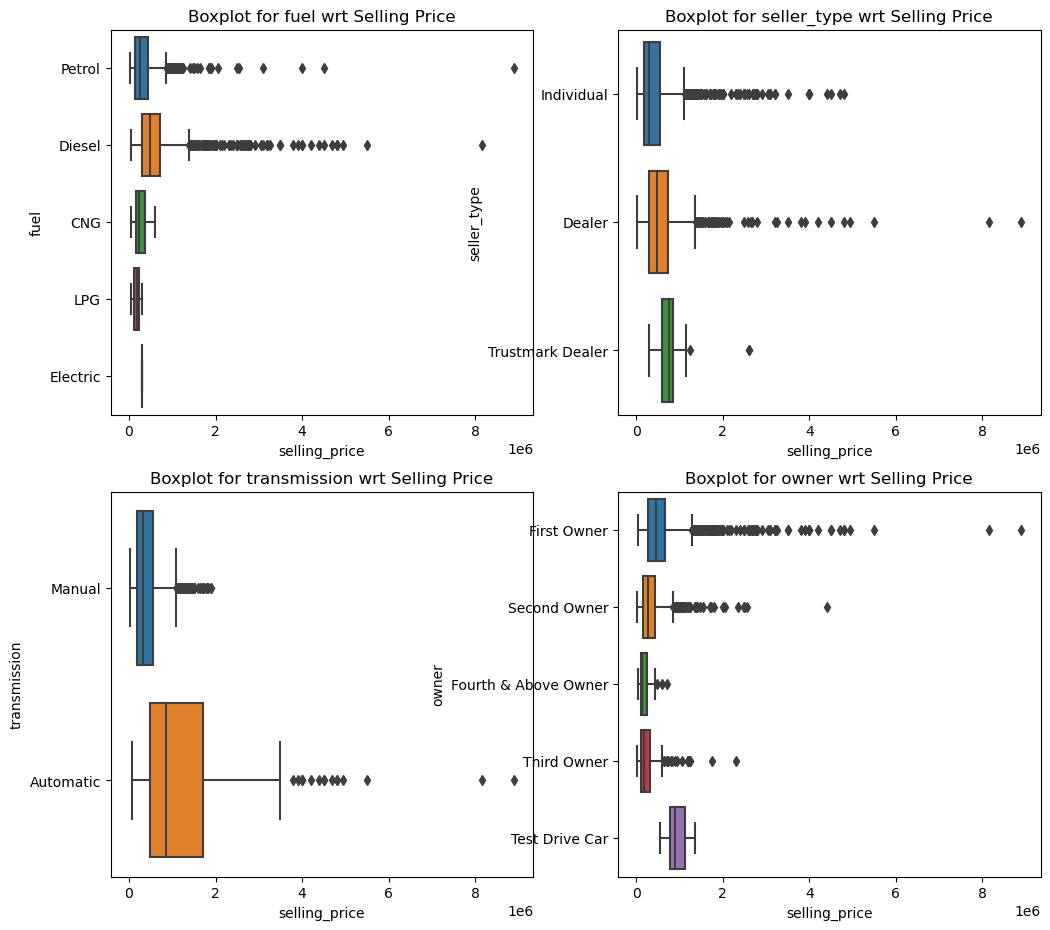

In [16]:
cols = ['fuel', 'seller_type', 'transmission', 'owner']
plt.figure(figsize=(12,11))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x =df['selling_price'], y=df[cols[i]])
    plt.title(f'Boxplot for {cols[i]} wrt Selling Price')
plt.show()

##### Outlier Removal

In [17]:
for i in num_cols:
    print(f'Feature {i} | Unique Count  {df[i].nunique()}')

Feature year | Unique Count  27
Feature selling_price | Unique Count  445
Feature km_driven | Unique Count  770


In [18]:
corr = df[['km_driven','selling_price']].corr()
corr

,km_driven,selling_price
km_driven,1.00000,-0.18784
selling_price,-0.18784,1.00000


In [20]:
temp=df.describe(percentiles=(0.01,0.02,0.03,0.05,0.95,0.97,0.98,0.99)).T
temp=temp.iloc[:,3:]
temp

,min,1%,2%,3%,5%,50%,95%,97%,98%,99%,max
year,1992.0,2000.00,2002.98,2004.0,2005.0,2013.0,2019.0,2019.0,2019.0,2020.0,2020.0
selling_price,20000.0,51546.61,60000.00,70000.0,80000.0,350000.0,1200000.0,1500000.0,1800500.0,2675000.0,8900000.0
km_driven,1.0,1728.42,5000.00,7000.0,10000.0,60658.0,149853.3,170000.0,195000.0,223336.6,806599.0


##### outlier treatment

In [21]:
df['selling_price']=np.where(df["selling_price"]>2675000.0,2675000.0,df['selling_price'])
df['km_driven']=np.where(df['km_driven']>223336.6,223336.6,df['km_driven'])

df['selling_price']=np.where(df["selling_price"]<51546.61,51546.61,df['selling_price'])
df['km_driven']=np.where(df['km_driven']<1728.42,1728.42,df['km_driven'])

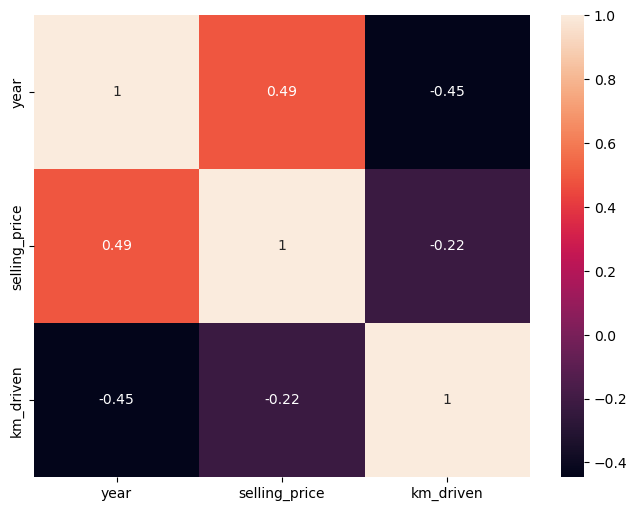

In [22]:
plt.figure(figsize=(8, 6))

sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

#### Encoding categorical Features

In [23]:
cat_cols

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

In [24]:
print(df['fuel'].value_counts())
print(df['seller_type'].value_counts())
print(df['transmission'].value_counts())
print(df['owner'].value_counts())

fuel
Diesel      1789
Petrol      1701
CNG           37
LPG           22
Electric       1
Name: count, dtype: int64
seller_type
Individual          2805
Dealer               712
Trustmark Dealer      33
Name: count, dtype: int64
transmission
Manual       3238
Automatic     312
Name: count, dtype: int64
owner
First Owner             2199
Second Owner             970
Third Owner              289
Fourth & Above Owner      75
Test Drive Car            17
Name: count, dtype: int64


In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
lb = LabelEncoder()
for i in ['fuel', 'seller_type', 'transmission', 'owner']:
    df[i] = lb.fit_transform(df[i])

In [27]:
print(df['fuel'].value_counts()) # Diesel:1,Petrol:4,CNG:0,LPG:3,Electric:2
print(df['seller_type'].value_counts()) # Individual:1,Dealer:0,Trustmark Dealer:2
print(df['transmission'].value_counts()) # Manual:1,Automatic:0
print(df['owner'].value_counts()) # First Owner:0,Second Owner:2,Third Owner:4,Fourth & Above Owner:1,Test Drive Car:3 

fuel
1    1789
4    1701
0      37
3      22
2       1
Name: count, dtype: int64
seller_type
1    2805
0     712
2      33
Name: count, dtype: int64
transmission
1    3238
0     312
Name: count, dtype: int64
owner
0    2199
2     970
4     289
1      75
3      17
Name: count, dtype: int64


In [28]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,2007,60000.0,70000.0,4,1,1,0
1,Maruti,2007,135000.0,50000.0,4,1,1,0
2,Hyundai,2012,600000.0,100000.0,1,1,1,0
3,Datsun,2017,250000.0,46000.0,4,1,1,0
4,Honda,2014,450000.0,141000.0,1,1,1,2


In [29]:
df_dum=df

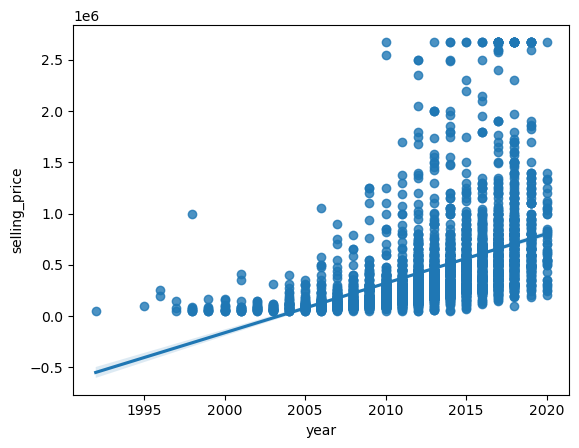

In [30]:
sns.regplot(x="year", y="selling_price", data=df)
plt.show()

In [148]:
#dum_df=df
#col=['name']
#df_dum = pd.get_dummies(data=df,columns =col,drop_first=True)
#print(df_dum.shape)
#df_dum.columns

(3550, 35)


Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'name_Audi', 'name_BMW', 'name_Chevrolet',
       'name_Daewoo', 'name_Datsun', 'name_Fiat', 'name_Force', 'name_Ford',
       'name_Honda', 'name_Hyundai', 'name_Isuzu', 'name_Jaguar', 'name_Jeep',
       'name_Kia', 'name_Land', 'name_MG', 'name_Mahindra', 'name_Maruti',
       'name_Mercedes-Benz', 'name_Mitsubishi', 'name_Nissan',
       'name_OpelCorsa', 'name_Renault', 'name_Skoda', 'name_Tata',
       'name_Toyota', 'name_Volkswagen', 'name_Volvo'],
      dtype='object')

#### Select x and y

In [31]:
x = df_dum.drop(['name','selling_price'],axis=1)
y = df_dum['selling_price']
print(x.shape)
print(y.shape)

(3550, 6)
(3550,)


#### Split data into train and test

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2485, 6)
(1065, 6)
(2485,)
(1065,)


##### Create Function for model Evaluation

In [34]:
from sklearn.metrics import *

In [35]:
def eval_model(model,x_train,y_train,x_test,y_test,mname):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    train_r2 = model.score(x_train,y_train) 
    test_r2 = model.score(x_test,y_test)
    test_mae = mean_absolute_error(y_test,ypred)
    test_mse = mean_squared_error(y_test,ypred)
    test_rmse = np.sqrt(test_mse)
    data = {'Train_R2':train_r2,'Test_R2':test_r2,'Test_MAE':test_mae,
          'Test_MSE':test_mse,'Test_RMSE':test_rmse}
    res = pd.DataFrame(data,index=[mname])
    return res

##### Import All Models

In [36]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

##### 1) Linear Regression

In [37]:
lr1 = LinearRegression()
lr1_res = eval_model(lr1,x_train,y_train,x_test,y_test,'Lin_Reg')
lr1_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
Lin_Reg,0.516201,0.505183,192829.064262,8.310390e+10,288277.46723


##### 2) Ridge

In [38]:
rid1 = Ridge(alpha=7)
rid1_res = eval_model(rid1,x_train,y_train,x_test,y_test,'Ridge')
rid1_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
Ridge,0.515946,0.507359,192471.64224,8.273843e+10,287642.880447


##### 3) Lasso

In [39]:
lasso1 = Lasso(alpha=45)
lasso1_res = eval_model(lasso1,x_train,y_train,x_test,y_test,'Lasso')
lasso1_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
Lasso,0.5162,0.505218,192818.103841,8.309803e+10,288267.285243


##### 4) DT Reg

In [40]:
dt1 = DecisionTreeRegressor(max_depth=7,min_samples_split=15)
dt1_res = eval_model(dt1,x_train,y_train,x_test,y_test,'DT_Reg')
dt1_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
DT_Reg,0.705796,0.530569,163027.061051,7.884038e+10,280785.28729


##### 5) RF_Reg

In [41]:
rf1 = RandomForestRegressor(n_estimators=80,max_depth=7,min_samples_split=15,random_state=42)
rf1_res = eval_model(rf1,x_train,y_train,x_test,y_test,'RF_Reg')
rf1_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
RF_Reg,0.707243,0.60663,158447.320821,6.606614e+10,257033.341739


##### 6) BaggingReg

In [42]:
bag1 = BaggingRegressor(n_estimators=40,max_features=x_train.shape[1],
                        max_samples=x_train.shape[0])
bag1_res = eval_model(bag1,x_train,y_train,x_test,y_test,'Bagging_Reg')
bag1_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
Bagging_Reg,0.869511,0.544328,172450.262187,7.652964e+10,276639.901465


##### 7) AdaBoost Reg

In [43]:
adab1 = AdaBoostRegressor(n_estimators=70)
adab1_res = eval_model(adab1,x_train,y_train,x_test,y_test,'AdaBoost_Reg')
adab1_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
AdaBoost_Reg,0.543793,0.464724,201590.933546,8.989908e+10,299831.746069


##### 8) KNN Reg

In [44]:
knn1 = KNeighborsRegressor(n_neighbors=7)
knn1_res = eval_model(knn1,x_train,y_train,x_test,y_test,'KNN_Reg')
knn1_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
KNN_Reg,0.404823,0.248357,219154.427811,1.262376e+11,355299.305504


In [45]:
res = pd.concat([lr1_res,rid1_res,lasso1_res,dt1_res,rf1_res,bag1_res,adab1_res,knn1_res])
res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
Lin_Reg,0.516201,0.505183,192829.064262,8.310390e+10,288277.467230
Ridge,0.515946,0.507359,192471.642240,8.273843e+10,287642.880447
Lasso,0.516200,0.505218,192818.103841,8.309803e+10,288267.285243
DT_Reg,0.705796,0.530569,163027.061051,7.884038e+10,280785.287290
RF_Reg,0.707243,0.606630,158447.320821,6.606614e+10,257033.341739
Bagging_Reg,0.869511,0.544328,172450.262187,7.652964e+10,276639.901465
AdaBoost_Reg,0.543793,0.464724,201590.933546,8.989908e+10,299831.746069
KNN_Reg,0.404823,0.248357,219154.427811,1.262376e+11,355299.305504


#### Inference
1) Best Model(with Min RMSE) = RF_Reg
2) Best Model(with Max Test_R2) = RF_Reg
3) Explainatory capability and minimal overfitting = RF_Reg
4) Considerate models : RF_Reg

#### Best Model selected : RandomForestClassifier

##### Saving the Model

In [46]:
import pickle

In [47]:
pickle.dump(rf1,open('rf_model_car_price_09nov.pkl','wb'))

In [48]:
model = pickle.load(open('rf_model_car_price_09nov.pkl','rb'))

#### Take the original data set and make another dataset by randomly picking 20 data points from the Car dataset and apply the saved model on the same

In [49]:
base_dataset = pd.read_csv('CAR_DETAILS.csv')
# Randomly select 20 data points
new_dataset = base_dataset.sample(n=20, random_state=42)
new_dataset

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
3978,Tata Manza Aqua Quadrajet BS IV,2010,165000,80000,Diesel,Individual,Manual,First Owner
1448,Renault KWID RXT BSIV,2019,250000,27000,Petrol,Individual,Manual,First Owner
2664,Hyundai Santro Xing GL Plus,2008,120000,41723,Petrol,Individual,Manual,Second Owner
17,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
1634,Mahindra TUV 300 T8 AMT,2016,730000,60000,Diesel,Individual,Automatic,Second Owner
881,Maruti Alto LX,2012,155000,19077,Petrol,Individual,Manual,Second Owner
134,Ford Figo Aspire 1.2 Ti-VCT Titanium Plus,2015,530000,14272,Petrol,Dealer,Manual,First Owner
2338,Maruti Alto 800 LXI,2013,92800,25000,Petrol,Individual,Manual,Second Owner
1992,Maruti Swift Dzire VDI,2016,284000,40000,Diesel,Individual,Manual,Second Owner
2886,Ford Figo 1.2P Titanium Plus MT,2012,260000,42000,Petrol,Dealer,Manual,First Owner


In [50]:
# Load the saved model
loaded_model = pickle.load(open('rf_model_car_price_09nov.pkl','rb'))

lb = LabelEncoder()
for i in ['fuel', 'seller_type', 'transmission', 'owner']:
    new_dataset[i] = lb.fit_transform(new_dataset[i])    
x_new= new_dataset.drop(['name','selling_price'],axis=1)
y_new = new_dataset['selling_price']
predictions = loaded_model.predict(x_new)
# Display the new dataset with prediction
new_dataset_with_predictions = new_dataset.copy()
new_dataset_with_predictions['predicted_target'] = predictions
print(new_dataset_with_predictions)

                                            name  year  selling_price  \
3978             Tata Manza Aqua Quadrajet BS IV  2010         165000   
1448                       Renault KWID RXT BSIV  2019         250000   
2664                 Hyundai Santro Xing GL Plus  2008         120000   
17                         Honda Amaze VX i-DTEC  2014         450000   
1634                     Mahindra TUV 300 T8 AMT  2016         730000   
881                               Maruti Alto LX  2012         155000   
134    Ford Figo Aspire 1.2 Ti-VCT Titanium Plus  2015         530000   
2338                         Maruti Alto 800 LXI  2013          92800   
1992                      Maruti Swift Dzire VDI  2016         284000   
2886             Ford Figo 1.2P Titanium Plus MT  2012         260000   
3827                  Maruti Baleno Delta Diesel  2015         511000   
2704                  Toyota Fortuner 4x2 Manual  2014        1800000   
1056  Mahindra Bolero Power Plus Plus AC BSIV PS  2